### Sentiment Analysis on Hotel Reviews Data

Dataset: https://www.kaggle.com/anu0012/hotel-review

In [1]:
# Import all necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Read the data
review_data = pd.read_csv('./data/train.csv')
review_data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
review_data.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id27360,The hotel is in a fantastic location - you can...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [4]:
review_data.shape

(38932, 5)

In [5]:
review_data.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

'User_ID': This seems to be any unique key corresponding to each user.\
'Description': This is the main review by the user.\
'Browser_Used': This seems to contain 11 unique elements corresponding to web browsing platforms.\
'Device_Used': This seems to contain only 3 unique element corresponding to device being used.

'Is_Response' is the label while the rest of the columns are independent features for this classification task

In [6]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


#### Performing EDA and Data Cleaning

In [7]:
## Check for missing values
mis_val = review_data.isnull().sum().sort_values(ascending=False)
mis_val_pct = mis_val/len(review_data) * 100
missing_data = pd.concat([mis_val, mis_val_pct], axis=1, keys=['Count', '%age'])
missing_data

,Count,%age
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


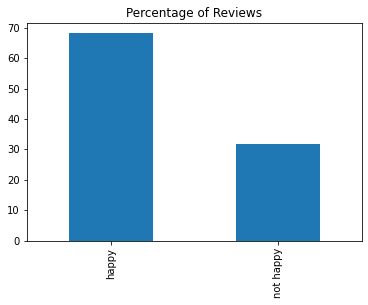

In [8]:
## Checking for data imbalance
print(round(review_data.Is_Response.value_counts(normalize=True)*100,2))
round(review_data.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title("Percentage of Reviews")
plt.show()

Data is moderately unbalanced with an inclination to the positive side.

In [9]:
print(review_data.columns)
review_data.head()

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')


,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [10]:
## Remove unnecessary columns
review_data.drop(columns=['User_ID', 'Browser_Used', 'Device_Used'], inplace=True)
review_data.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


##### Text Data Cleanup

In [11]:
## Convert all to lower case and remove brackets, numbers, punctuations
import re
import string

def text_clean_1(text):
    text = text.lower()   # Converts text into lower case
    text = re.sub('\([^()]*\)', '', text)   # Removes All Brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Removes escape characters
    text = re.sub('[''""_]', '', text)   # remove quotes and continuations
    text = re.sub('\n', '', text)        # remove newline characters
    text = re.sub('\w*\d\w*', '', text)  # Removes any digits
    
    return text

cleaned_data_1 = lambda x: text_clean_1(x)

In [12]:
review_data['cleaned_desc'] = pd.DataFrame(review_data.Description.apply(cleaned_data_1))
review_data.head()

,Description,Is_Response,cleaned_desc
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


#### Model Training

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(review_data.cleaned_desc, review_data.Is_Response,
                                                   test_size=0.1, random_state=365)
print("Size of X Train: ", x_train.shape[0])
print("Size of X Test : ", x_test.shape[0])
print("Size of Y Train: ", y_train.shape[0])
print("Size of Y Test : ", y_test.shape[0])

Size of X Train:  35038
Size of X Test :  3894
Size of Y Train:  35038
Size of Y Test :  3894


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer()
clf = LogisticRegression(solver='lbfgs')

from sklearn.pipeline import Pipeline

In [15]:
model = Pipeline([('vectorizer', tfidf), ('classifier', clf)])
model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

#### Metrics

In [16]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test)
confusion_matrix(predictions, y_test)

array([[2496,  277],
       [ 152,  969]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy of the training  : ", accuracy_score(predictions, y_test))
print("Precision of the training : ", precision_score(predictions, y_test, average='weighted'))
print("Recall of the training    : ", recall_score(predictions, y_test, average='weighted'))

Accuracy of the training  :  0.8898305084745762
Precision of the training :  0.8951242162230315
Recall of the training    :  0.8898305084745762


#### Make Predictions

In [18]:
test_review = ["I'm kind of new here, but I liked the way you did it"]

print("The Review has been classified as: {}".format(model.predict(test_review)))

The Review has been classified as: ['happy']


In [19]:
## Use the test dataset (unseen data) and classify it.
review_test = pd.read_csv('./data/test.csv')
review_test.drop(columns=['User_ID', 'Browser_Used', 'Device_Used'], inplace=True)
review_test['cleaned_desc2'] = pd.DataFrame(review_test.Description.apply(cleaned_data_1))
review_test.head()

,Description,cleaned_desc2
0,Looking for a motel in close proximity to TV t...,looking for a motel in close proximity to tv t...
1,Walking distance to Madison Square Garden and ...,walking distance to madison square garden and ...
2,Visited Seattle on business. Spent - nights in...,visited seattle on business spent nights in t...
3,This hotel location is excellent and the rooms...,this hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...,this hotel is awesome i love the service antho...


In [20]:
unseen_predictions = pd.Series(model.predict(review_test.cleaned_desc2))
predicted_df = pd.concat([review_test.cleaned_desc2, unseen_predictions], axis=1, keys=['unseen reviews', 'prediction'])
predicted_df.head()

,unseen reviews,prediction
0,looking for a motel in close proximity to tv t...,not happy
1,walking distance to madison square garden and ...,happy
2,visited seattle on business spent nights in t...,not happy
3,this hotel location is excellent and the rooms...,not happy
4,this hotel is awesome i love the service antho...,happy


happy        71.12
not happy    28.88
Name: prediction, dtype: float64


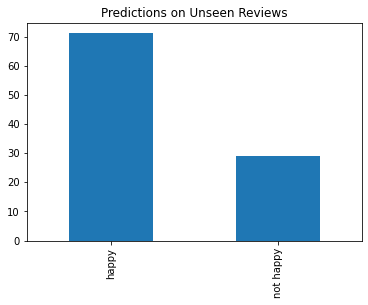

In [21]:
print(round(predicted_df.prediction.value_counts(normalize=True)*100,2))
round(predicted_df.prediction.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title("Predictions on Unseen Reviews")
plt.show()

##### If you like my programs, consider following me on GitHub